In [1]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
x  = '/kaggle/input/intel-image-classification/seg_train/seg_train'
path = Path(x)
path.ls()

[PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/street'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/sea'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/forest'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/glacier')]

In [3]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

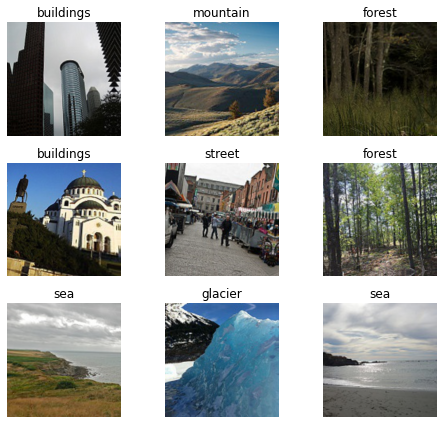

In [4]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [5]:
data

ImageDataBunch;

Train: LabelList (11228 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,mountain,mountain,mountain,mountain
Path: /kaggle/input/intel-image-classification/seg_train/seg_train;

Valid: LabelList (2806 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sea,mountain,mountain,mountain,mountain
Path: /kaggle/input/intel-image-classification/seg_train/seg_train;

Test: None

In [6]:
print(data.classes)
len(data.classes)
data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


6

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


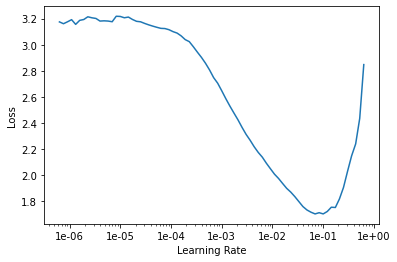

In [8]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [9]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.410735,0.332701,0.889879,00:58
1,0.389926,0.299781,0.903065,00:51
2,0.347939,0.249984,0.916607,00:51
3,0.343061,0.305242,0.890592,00:50
4,0.343205,0.309887,0.905560,00:50
5,0.494181,0.372429,0.907698,00:53
6,0.633950,1.188030,0.805773,00:53
7,0.689379,0.376928,0.898788,00:51
8,0.915318,0.770827,0.859230,00:52
9,0.721527,6.234784,0.886671,00:51


In [10]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.150910,0.289169,0.932288,00:52
1,0.171557,1.186018,0.921240,00:52
2,0.194354,0.256048,0.925873,00:51
3,0.217785,0.296192,0.904490,00:51
4,0.221999,0.238895,0.918033,00:52
5,0.210930,0.305710,0.921597,00:52
6,0.180660,0.354129,0.916964,00:51
7,0.190408,0.242471,0.917676,00:50
8,0.160024,0.268025,0.928011,00:51
9,0.148428,0.299053,0.902352,00:50


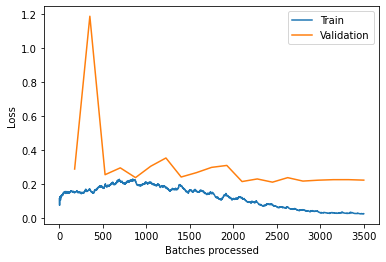

In [11]:
learn.recorder.plot_losses()

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

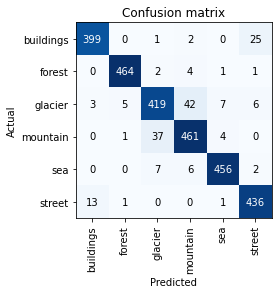

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

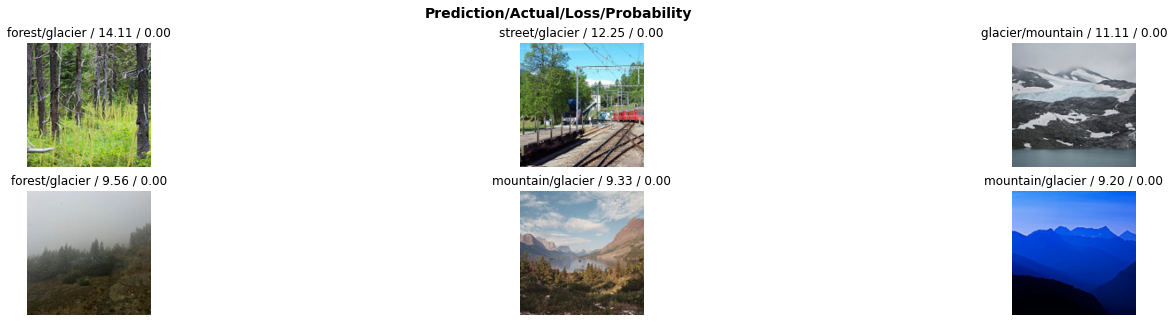

In [13]:
interp.plot_top_losses(6,figsize = (25,5))

In [14]:
img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
print(learn.predict(img)[0])

glacier


In [15]:
img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
print(learn.predict(img)[0])

glacier


In [16]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>